# LEAD SCORING CASE STUDY

#### Importing Libraries

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

#### Importing Data

In [3]:
lead_df = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', None)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Missing Data Percentage 

round(lead_df.isnull().sum()/lead_df.shape[0], 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

#### Data Preparartion

In [7]:
## Converting Yes/No to 1/0

for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    lead_df[feature] = lead_df[feature].apply(lambda x : 1 if x=='Yes' else 0)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [8]:
#### Converting SELECTs into NaNs:

lead_df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [9]:
# Checking labels of  remaining categorical columns

for col in lead_df.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(lead_df[col].value_counts(normalize= True))
    print("_________________________________________________________________________________________________")

Lead Origin
_________________________________________________________________________________________________
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
_________________________________________________________________________________________________
Lead Source
_________________________________________________________________________________________________
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone           

In [10]:
# Converting all  selects to NaN 

lead_df = lead_df.replace('Select', np.nan)
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Analysing Missing Data

In [11]:

#Dropping columns that have more than 70% null values

lead_df = lead_df.drop(lead_df.loc[:,list(round(lead_df.isnull().sum()/lead_df.shape[0], 2)>0.70)].columns, 1)

In [12]:
## Updating NaN to "Not Sure" as  Lead Quality depends upons the intuition of the employee

lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan, 'Not Sure')

In [13]:
lead_df = lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [14]:
# Impute  MUMBAI into NULLs as most values belong to MUMBAI
lead_df['City'] = lead_df['City'].replace(np.nan, 'Mumbai')

# No significant difference in top 3 specialisation hence impute NaN with Others
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Other_Specialization')

# For Tags column more than 30% data is for "Will revert after reading the email"  hence impute NULLS with Will revert after reading the email
lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'Will revert after reading the email')

# More than 99% data is of "Better Career Prospects", hence impute NULLS with this value
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

# More than 95% data is of "India" and hence it is safer to impute NULLS with this value
lead_df['Country'] = lead_df['Country'].replace(np.nan, 'India')

In [15]:
# Checking missing data percentage in the updated dataframe

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [16]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
lead_df.dropna(inplace=True)

lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


#### Exploratory Data Analysis

In [17]:
## Checking for data imbalance

lead_df["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

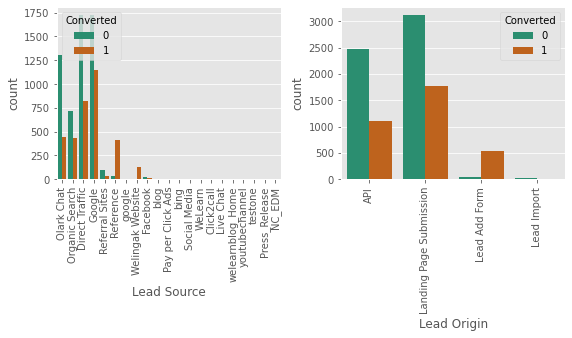

In [18]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(lead_df[feature], hue=lead_df["Converted"], palette="Dark2")
    plt.xticks(rotation=90)
    plt.tight_layout()

In [19]:
### Clubbing minimal lead sources into others

lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

lead_df['Lead Source'] = lead_df['Lead Source'].replace("google", 'Google')

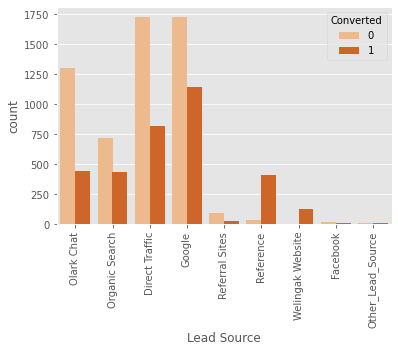

In [20]:
## Lead Source

sns.countplot(x="Lead Source", hue="Converted", palette = "Oranges", data= lead_df)
plt.xticks(rotation='vertical')
plt.show()

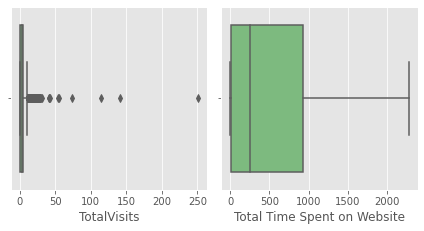

In [21]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(lead_df[feature],palette = "Greens")
    plt.tight_layout()

In [22]:
## Capping outliers in  Total Visits columns 

q1 = lead_df["TotalVisits"].quantile(0.95)
lead_df["TotalVisits"][lead_df["TotalVisits"] >= q1] = q1

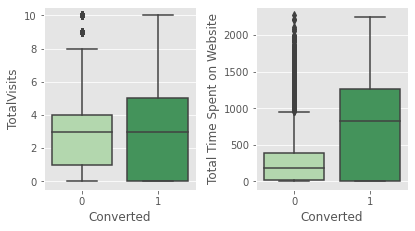

In [23]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = lead_df, palette = "Greens")
    plt.tight_layout()

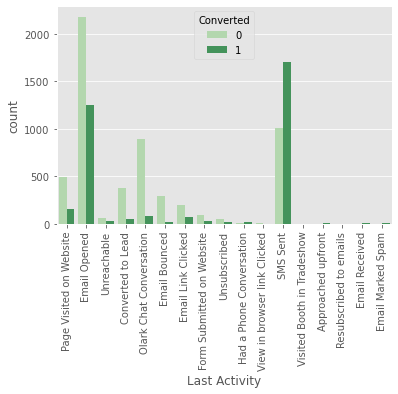

In [24]:


sns.countplot(x="Last Activity", hue="Converted", palette = "Greens", data= lead_df)
plt.xticks(rotation='vertical')
plt.show()

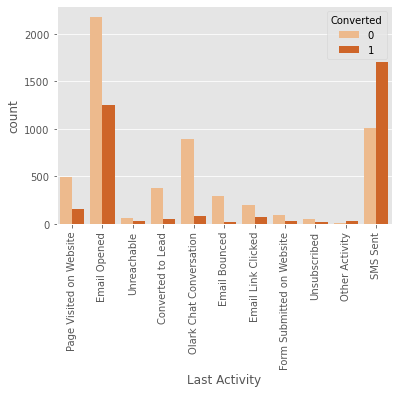

In [25]:
# Converting all the low count categories to the 'Others' category
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

# lets plot the Last Activity again 
sns.countplot(x="Last Activity", hue="Converted",palette = "Oranges", data= lead_df)
plt.xticks( rotation='vertical')
plt.show()

In [26]:
## Focusing on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

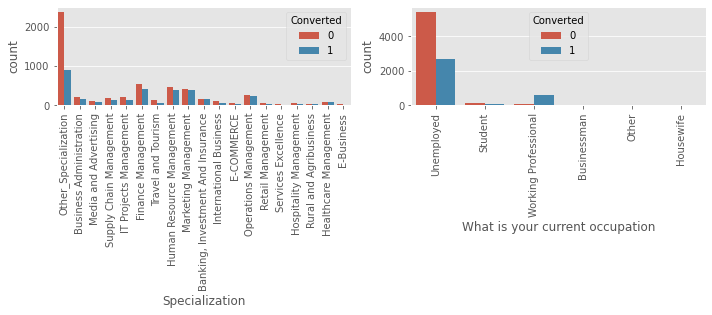

In [27]:
fig=plt.subplots(figsize=(10, 6))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=lead_df)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

In [28]:
## In order to increase overall conversion rate, increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

In [29]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace("Other", 'Other_Occupation')

In [30]:
lead_df[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.000000
mean,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.318272
std,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.465831
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


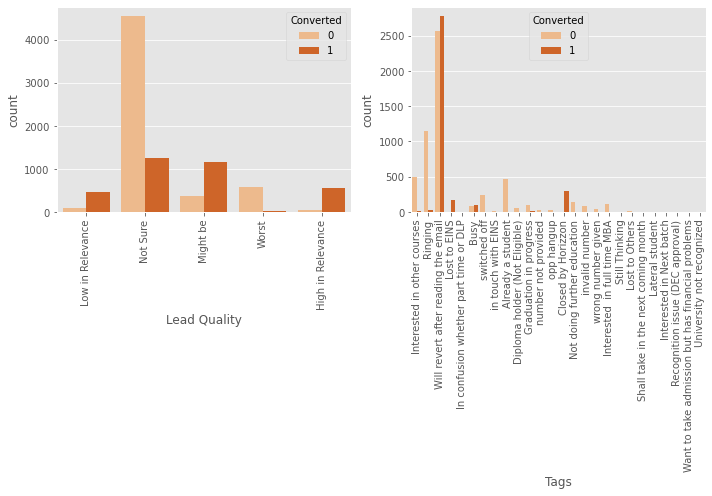

In [31]:
fig=plt.subplots(figsize=(10, 10))

for i, feature in enumerate(["Lead Quality", "Tags"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", palette = "Oranges", data=lead_df)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

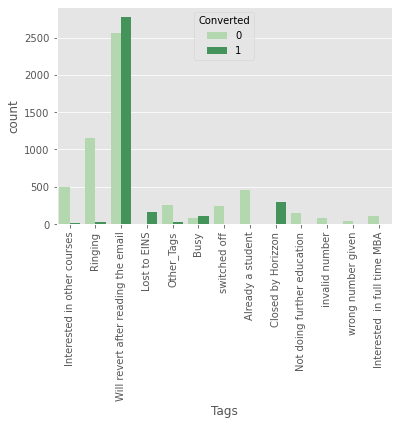

In [32]:
# Converting all low count categories to Others category
lead_df['Tags'] = lead_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

# lets plot the Tags again
sns.countplot(x="Tags", hue="Converted", palette="Greens", data= lead_df)
plt.xticks( rotation='vertical')
plt.show()

In [33]:
# Dropping unnecessary columns

lead_df = lead_df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],1)

lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


### Dummy Variable Creation

In [34]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  Tags                             9074 non-null   object 
 12  Lead Quality        

In [35]:
dummy = pd.get_dummies(lead_df[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [36]:
lead_df = lead_df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis=1)
lead_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0


In [37]:
lead_df = pd.concat([lead_df,dummy], axis=1)
lead_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Test Train Split

In [38]:
# Keeping the feature variables in X & response variables to y
X = lead_df.drop(['Prospect ID', 'Converted'], axis = 1)
y = lead_df['Converted']

In [39]:
# Splitting the data into test and train 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)

### Feature Selection

In [40]:
# Using standard scaler to scale the data

scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
conv_rate = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
conv_rate

37.85541106458012

### Checking Co-relations among the features

In [42]:
# Checking correlations
conv_corr = lead_df.corr()

#Unstacking the correlation matrix
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                             0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                            0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800686
TotalVisits                            Page Views Per Visit                             0.737996
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.691811
Do Not Email                           Last Activity_Email Bounced                      0.620041
Last Activity_Unreachable              Last Notable Activity_Unreachable                0.594369
dtype: float64

In [43]:
# Dropping highly co-related factors
X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Lead Source_Reference','Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent',
                     'Last Notable Activity_Email Link Clicked','Page Views Per Visit','Last Notable Activity_Page Visited on Website','Last Activity_Email Bounced','Last Notable Activity_Unreachable'],1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Lead Source_Reference','Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent',
                     'Last Notable Activity_Email Link Clicked','Page Views Per Visit','Last Notable Activity_Page Visited on Website','Last Activity_Email Bounced','Last Notable Activity_Unreachable'],1)

In [44]:
conv_corr = X_train.corr()

In [45]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Last Activity_Other Activity                          Last Notable Activity_Had a Phone Conversation    0.593057
Lead Source_Olark Chat                                Specialization_Other_Specialization               0.505771
Lead Origin_Lead Add Form                             Lead Source_Welingak Website                      0.468225
TotalVisits                                           Lead Origin_Landing Page Submission               0.447765
Lead Source_Olark Chat                                Last Activity_Olark Chat Conversation             0.419173
Last Activity_Olark Chat Conversation                 Last Notable Activity_Olark Chat Conversation     0.406150
What is your current occupation_Unemployed            Lead Quality_Not Sure                             0.383141
TotalVisits                                           Total Time Spent on Website                       0.349466
What is your current occupation_Working Professional  Lead Quality_Might be                     

### Model Building

In [46]:
# Logistic Regression Model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           74
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1278.0
Date:                Sun, 26 Feb 2023   Deviance:                       2556.0
Time:                        22:43:07   Pearson chi2:                 3.07e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6057
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9218      1.782      1.078      0.281      -1.572       5.415
Do Not Email                                            -1.4532      0.296     -4.904      0.000      -2.034      -0.872
TotalVisits                                              0.0035      0.073      0.048      0.961      -0.140       0.147
Total Time Spent on Website                              1.1441      0.063     18.085      0.000       1.020       1.268
Lead Origin_Landing Page Submission                     -1.0732      0.216     -4.965      0.000      -1.497      -0.650
Lead Origin_Lead Add Form                                1.3476      0.432      3.117      0.002       0.500       2.195
Lead Origin_Lead Import                                  1.1828      0.818      1.445      0.148      -0.421       2.787
Lead Source_Google                                       0.1562      0.151      1.032      0.302      -0.140       0.453
Lead Source_Olark Chat                                   0.9937      0.224      4.439      0.000       0.555       1.432
Lead Source_Organic Search                               0.1168      0.203      0.576      0.565      -0.281       0.514
Lead Source_Other_Lead_Source                            0.5190      0.789      0.658      0.511      -1.028       2.066
Lead Source_Referral Sites                              -0.1943      0.491     -0.395      0.692      -1.158       0.769
Lead Source_Welingak Website                             3.8489      0.836      4.606      0.000       2.211       5.487
Last Activity_Email Link Clicked                        -0.7899      0.444     -1.780      0.075      -1.660       0.080
Last Activity_Email Opened                              -0.3717      0.329     -1.130      0.258      -1.016       0.273
Last Activity_Form Submitted on Website                  0.1963      0.580      0.339      0.735      -0.940       1.333
Last Activity_Olark Chat Conversation                   -0.5026      0.376     -1.338      0.181      -1.239       0.234
Last Activity_Other Activity                             1.4750      1.165      1.266      0.205      -0.808       3.758
Last Activity_Page Visited on Website                   -0.3446      0.383     -0.900      0.368      -1.095       0.406
Last Activity_SMS Sent                                   1.7070      0.320      5.341      0.000       1.081       2.333
Last Activity_Unreachable                                0.6589      0.560      1.177      0.239      -0.439       1.756
Last Activity_Unsubscribed                               0.6978      0.780      0.895      0.371      -0.830       2.226
Specialization_Business Administration                  -0

### Feature selection using RFE

In [47]:
# Selecting features using RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 59),
 ('Total Time Spent on Website', False, 4),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Source_Google', False, 45),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Other_Lead_Source', False, 31),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', False, 26),
 ('Last Activity_Form Submitted on Website', False, 47),
 ('Last Activity_Olark Chat Conversation', False, 21),
 ('Last Activity_Other Activity', False, 6),
 ('Last Activity_Page Visited on Website', False, 25),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 11),
 ('Last Activity_Unsubscribed', False, 15),
 ('Specialization_Business Administration', False, 56),
 ('Specialization_E-Bus

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Assessing the model with StatsModels

In [49]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1553.1
Date:                Sun, 26 Feb 2023   Deviance:                       3106.2
Time:                        22:43:13   Pearson chi2:                 4.04e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5700
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0794      0.217     -4.963      0.000      -1.506      -0.653
Do Not Email                                     -1.1895      0.221     -5.376      0.000      -1.623      -0.756
Lead Origin_Lead Add Form                         0.8693      0.366      2.372      0.018       0.151       1.587
Lead Source_Welingak Website                      3.2594      0.820      3.976      0.000       1.653       4.866
Last Activity_SMS Sent                            1.9538      0.103     19.039      0.000       1.753       2.155
Tags_Busy                                         3.4717      0.323     10.757      0.000       2.839       4.104
Tags_Closed by Horizzon                           8.4090      0.775     10.849      0.000       6.890       9.928
Tags_Lost to EINS                                 9.4298      0.766     12.317      0.000       7.929      10.930
Tags_Ringing                                     -1.9594      0.331     -5.911      0.000      -2.609      -1.310
Tags_Will revert after reading the email          3.6656      0.231     15.900      0.000       3.214       4.117
Tags_invalid number                             -22.4206   1.34e+04     -0.002      0.999   -2.62e+04    2.62e+04
Tags_switched off                                -2.5297      0.584     -4.331      0.000      -3.674      -1.385
Lead Quality_Not Sure                            -3.4872      0.130    -26.738      0.000      -3.743      -3.232
Lead Quality_Worst                               -3.9571      0.834     -4.745      0.000      -5.592      -2.323
Last Notable Activity_Modified                   -1.6959      0.107    -15.830      0.000      -1.906      -1.486
Last Notable Activity_Olark Chat Conversation    -1.3029      0.352     -3.699      0.000      -1.993      -0.612
=================================================================================================================
"""

- "Tags_invalid number" has got high p-value, hence, it is wise to drop this feature

In [50]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.288839
1012    0.110023
9226    0.001892
4750    0.741307
7987    0.994066
1281    0.989439
2880    0.288839
4971    0.702437
7536    0.929965
1248    0.001892
dtype: float64

In [51]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28883901, 0.11002273, 0.00189224, 0.7413066 , 0.99406588,
       0.98943879, 0.28883901, 0.70243735, 0.92996485, 0.00189224])

In [52]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.288839,3009
1,0,0.110023,1012
2,0,0.001892,9226
3,1,0.741307,4750
4,1,0.994066,7987


In [53]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.288839,3009,0
1,0,0.110023,1012,0
2,0,0.001892,9226,0
3,1,0.741307,4750,1
4,1,0.994066,7987,1


##### Overall acuracy

In [54]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

# Acuracy is same

Accuracy score 0.9209573295544009


#### Check the VIF again

In [55]:
# Checking the VIF:

def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(X_train[col])

                                         Features  Variance Inflation Factor
11                          Lead Quality_Not Sure                       3.02
8        Tags_Will revert after reading the email                       2.70
13                 Last Notable Activity_Modified                       1.69
3                          Last Activity_SMS Sent                       1.63
1                       Lead Origin_Lead Add Form                       1.58
7                                    Tags_Ringing                       1.53
2                    Lead Source_Welingak Website                       1.35
5                         Tags_Closed by Horizzon                       1.17
0                                    Do Not Email                       1.13
12                             Lead Quality_Worst                       1.13
4                                       Tags_Busy                       1.11
10                              Tags_switched off                       1.10

In [56]:
col = col.drop('Tags_invalid number')

In [57]:
# Re-running the model after dropping the feature
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1559.1
Date:                Sun, 26 Feb 2023   Deviance:                       3118.3
Time:                        22:43:13   Pearson chi2:                 3.94e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5692
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2486      0.218     -5.725      0.000      -1.676      -0.821
Do Not Email                                     -1.1805      0.221     -5.350      0.000      -1.613      -0.748
Lead Origin_Lead Add Form                         0.9081      0.369      2.464      0.014       0.186       1.630
Lead Source_Welingak Website                      3.2182      0.820      3.923      0.000       1.611       4.826
Last Activity_SMS Sent                            1.9270      0.102     18.901      0.000       1.727       2.127
Tags_Busy                                         3.6495      0.322     11.338      0.000       3.019       4.280
Tags_Closed by Horizzon                           8.5559      0.776     11.031      0.000       7.036      10.076
Tags_Lost to EINS                                 9.5786      0.766     12.504      0.000       8.077      11.080
Tags_Ringing                                     -1.7714      0.330     -5.368      0.000      -2.418      -1.125
Tags_Will revert after reading the email          3.8317      0.231     16.579      0.000       3.379       4.285
Tags_switched off                                -2.3367      0.583     -4.008      0.000      -3.479      -1.194
Lead Quality_Not Sure                            -3.4792      0.130    -26.743      0.000      -3.734      -3.224
Lead Quality_Worst                               -3.9437      0.836     -4.720      0.000      -5.581      -2.306
Last Notable Activity_Modified                   -1.6821      0.107    -15.737      0.000      -1.892      -1.473
Last Notable Activity_Olark Chat Conversation    -1.3049      0.352     -3.706      0.000      -1.995      -0.615
=================================================================================================================
"""

In [58]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.289842
1012    0.111387
9226    0.001918
4750    0.737087
7987    0.993914
1281    0.989122
2880    0.289842
4971    0.700282
7536    0.929765
1248    0.001918
dtype: float64

In [59]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2898423 , 0.11138705, 0.00191849, 0.73708704, 0.99391432,
       0.98912239, 0.2898423 , 0.700282  , 0.92976455, 0.00191849])

In [60]:
# Creating dataframe with true converted status and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob': y_train_pred})
y_train_pred_final['Pros_ID']=y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.289842,3009
1,0,0.111387,1012
2,0,0.001918,9226
3,1,0.737087,4750
4,1,0.993914,7987


In [61]:
# Creating a new column 'predicted' with 1 if Convert_Prob > 0.5 else taking as 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.289842,3009,0
1,0,0.111387,1012,0
2,0,0.001918,9226,0
3,1,0.737087,4750,1
4,1,0.993914,7987,1


In [62]:
# Checking the accuracy
acc_score = metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted)
acc_score

0.920642418516769

### Checking the VIF 

In [63]:
def vif_val(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

vif_val(X_train[col])

                                         Features  Variance Inflation Factor
10                          Lead Quality_Not Sure                       2.97
8        Tags_Will revert after reading the email                       2.66
12                 Last Notable Activity_Modified                       1.68
3                          Last Activity_SMS Sent                       1.62
1                       Lead Origin_Lead Add Form                       1.58
7                                    Tags_Ringing                       1.51
2                    Lead Source_Welingak Website                       1.35
5                         Tags_Closed by Horizzon                       1.17
0                                    Do Not Email                       1.12
11                             Lead Quality_Worst                       1.12
4                                       Tags_Busy                       1.11
9                               Tags_switched off                       1.09

- The VIFs of all the features is less than 5, hence, there is no need to drop any more variables further. Hence, predictions can be made using the final model

## MODEL EVALUATION

In [64]:
def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    
    TP =confusion[1,1]
    TN =confusion[0,0]
    FP =confusion[0,1]
    FN =confusion[1,0]
    
    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_score

In [65]:
# Evaluating Model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score = True)

Confusion Matrix :
 [[3761  144]
 [ 360 2086]]
Accuracy : 0.920642418516769
Sensitivity : 0.8528209321340965
Specificity : 0.963124199743918
Precision : 0.9354260089686098


(0.920642418516769,
 0.8528209321340965,
 0.963124199743918,
 <function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>)

#### PLOTING THE ROC CURVE

In [66]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [67]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False)

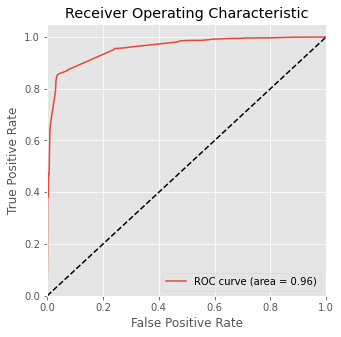

In [68]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### Precision-Recall Trade off

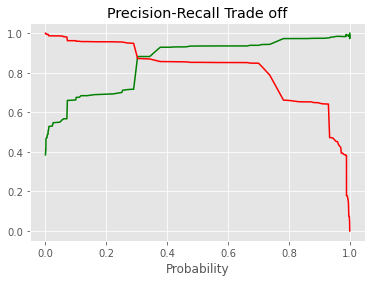

In [69]:

p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

##### In Sensitivity-Accuracy plot 0.27 probability looks optimal. 
##### In Precision-Recall Curve 0.3 looks optimal.

##### We are taking 0.3 is the optimum point as a cutoff probability and assigning lead score in training data.

In [70]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.3 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.289842,3009,0,29
1,0,0.111387,1012,0,11
2,0,0.001918,9226,0,0
3,1,0.737087,4750,1,74
4,1,0.993914,7987,1,99


## Evaluating the Model performance

In [71]:
# Evaluating the model performance on training data set

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True  )

Confusion Matrix :
 [[3620  285]
 [ 312 2134]]
Accuracy : 0.9059990552668871
Sensitivity : 0.8724448078495503
Specificity : 0.9270166453265045
Precision : 0.882182720132286


(0.9059990552668871,
 0.8724448078495503,
 0.9270166453265045,
 <function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>)

In [72]:
# Predicted values on the train set

X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.3 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

# Lets see the head:
y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,0.289842,0,29
1,1,1490,0.929765,1,93
2,0,7936,0.289842,0,29
3,1,4216,0.998548,1,100
4,0,3830,0.289842,0,29


In [73]:
# Evaluating the model performance on test data:

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix :
 [[1603  131]
 [ 144  845]]
Accuracy : 0.8990084465662872
Sensitivity : 0.8543983822042467
Specificity : 0.9244521337946944
Precision : 0.8657786885245902


(0.8990084465662872,
 0.8543983822042467,
 0.9244521337946944,
 <function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>)

## FINAL MODEL

In [74]:
# Building the ligistic regression model and returns the predicted values

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
# Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    
    
    print("------------------Result of training data-------------------")
    
    print(y_train_pred_final.head())
    
# Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    
    
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    
    
    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [75]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.3)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.289842                  0          29
1         1012          0             0.111387                  0          11
2         9226          0             0.001918                  0           0
3         4750          1             0.737087                  1          74
4         7987          1             0.993914                  1          99
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.289842                  0          29
1         1490          1             0.929765                  1          93
2         7936          0             0.289842                  0          29
3         4216          1             0.998548                  1         100
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.289842,0,29
1,1490,1,0.929765,1,93
2,7936,0,0.289842,0,29
3,4216,1,0.998548,1,100
4,3830,0,0.289842,0,29
...,...,...,...,...,...
2718,850,0,0.070553,0,7
2719,2879,0,0.001642,0,0
2720,6501,1,0.989122,1,99
2721,7155,0,0.070553,0,7


In [76]:
print("features used in final model :", col)
print("-----------------feature importtance-------------------")
print(res.params)

features used in final model : Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')
-----------------feature importtance-------------------
const                                           -1.248649
Do Not Email                                    -1.180501
Lead Origin_Lead Add Form                        0.908052
Lead Source_Welingak Website                     3.218160
Last Activity_SMS Sent                           1.927033
Tags_Busy                                        3.649486
Tags_Closed by Horizzon                          8.555901
Tags_Lost to EINS                                9.578632
Ta

## Conclusion:
  ###### The logistic regression model predicts the probability of the target                     variable having certain value.
  ###### Optimum cut off value is chosen to be 0.3
  ###### Our final logistic model is build with 14 features.
  ###### Tags_lost to EINS (coefficient factor = 9.578632)
  ###### Lead quality_worst (coefficient factor = -3.943680)
  ###### Tags_closed by horizon (coeficient factor = 8.555901)
  
  ###### The final model has sensitivity of 0.928, this means the model is able to predict 92% customers out of all the 
  ###### The final model has Precision of 0.865 this means 86.5% of predicted hot leads are True Hot Leads.
  